In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
train = pd.read_csv('train_file.csv')
print(train.shape)
train.head()

(55932, 11)


,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [8]:
test = pd.read_csv('test_file.csv')
test.shape

(37288, 9)

In [9]:
train.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

# Target

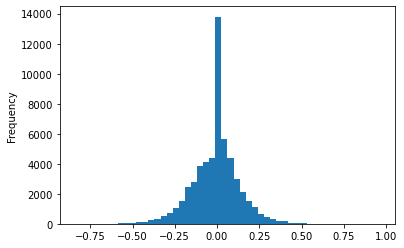

In [22]:
train['SentimentTitle'].plot(kind='hist',bins=50)

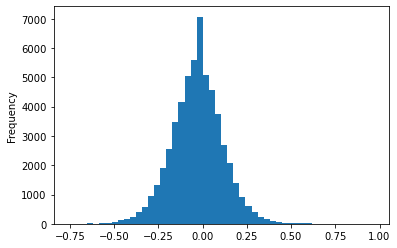

In [8]:
train['SentimentHeadline'].plot(kind='hist',bins=50)

In [11]:
train[train['SentimentTitle']==0].shape

(11306, 11)

In [12]:
train[train['SentimentHeadline']==0].shape

(1704, 11)

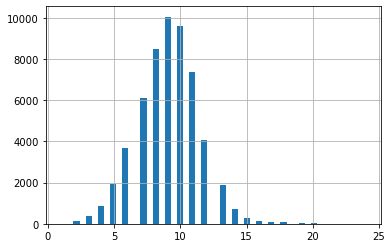

In [10]:
train['Title'].str.split().apply(len).hist(bins=50)

In [44]:
train['Title'].str.split().apply(len).max()

24

In [12]:
train['Title'].str.split().apply(len).min()

1

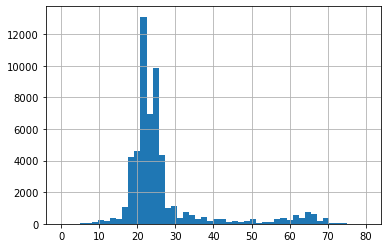

In [11]:
train['Headline'].str.split().apply(len).hist(bins=50)

In [47]:
train['Headline'].str.split().apply(len).max()

80

In [13]:
train['Headline'].str.split().apply(len).min()

0

In [15]:
train[train['Headline'].str.split().apply(len)==0]

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
8200,UdkA1vBREx,"Rise of the Tomb Raider Dev Says Microsoft, Sq...",,GameSpot via Yahoo! News,microsoft,2015-11-30 10:48:00,0,0,0,-0.018493,0.0


# Source

In [14]:
train[train['Source']=='Bloomberg'].shape

(992, 11)

In [15]:
train['Source'].nunique()

4753

In [16]:
train['Source'].value_counts().head()

Bloomberg         992
Reuters           763
ABC News          645
New York Times    573
The Guardian      551
Name: Source, dtype: int64

In [20]:
train.loc[train['SentimentTitle']<0,'Source'].value_counts().head()

Bloomberg           389
Reuters             336
The Guardian        271
ABC News            265
Business Insider    262
Name: Source, dtype: int64

In [21]:
train.loc[train['SentimentTitle']>0,'Source'].value_counts().head()

Bloomberg           387
Reuters             309
ABC News            267
New York Times      233
Business Insider    216
Name: Source, dtype: int64

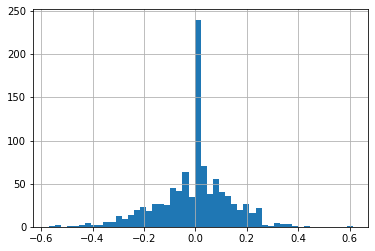

In [29]:
train.loc[train['Source']=='Bloomberg','SentimentTitle'].hist(bins=50)

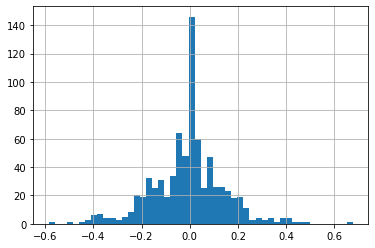

In [30]:
train.loc[train['Source']=='Reuters','SentimentTitle'].hist(bins=50)

In [19]:
a=[1,2,3]
b=[3,4,5]

In [20]:
def rmse(a,b):
    ls=[]
    for i in range(len(a)):
        ls.append((a[i]-b[i])**2)
    return np.sqrt(sum(ls)/len(a))

In [21]:
rmse(a,b)

2.0

In [22]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(a,b))

2.0